# PCA without Scikit-learn

## Load libraries

In [0]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # we mainly work with this
from scipy import misc # import images for testing

## Load images

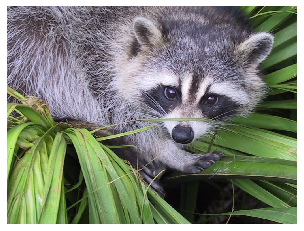

In [3]:
img = misc.face()
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
## Taking the R,G,B components
c_r = img[:,:,0] # red
c_g = img[:,:,1] # green
c_b = img[:,:,2] # blue

## Construct the function

Source (I modified a little bit): [here](https://github.com/NourozR/Reconstruction-and-Compression-of-Color-Images/blob/master/image_reconstruction_using_PCA.py). 

In [0]:
def comp_2d(image_2d, n_components): # will be applied for each red/green/blue
  data_mat = image_2d - np.mean(image_2d) # X - mean(X) : data matrix
  eig_val, eig_vec = np.linalg.eigh(np.cov(data_mat)) # eigenvalues & eigenvectors
  p = np.size(eig_vec, axis=1)

  idx = np.argsort(eig_val) # sort the eigenvalues to choose the top k ones
  idx = idx[::-1]

  eig_vec = eig_vec[:,idx] # choose k eigenvectors w.r.t. k chosen eigenvalues
  eig_val = eig_val[idx]

  if n_components < p or n_components > 0:
    eig_vec = eig_vec[:, range(n_components)]

  score = np.dot(eig_vec.T, data_mat) # transform to new space

  inv_trans = np.dot(eig_vec, score) + np.mean(image_2d).T # inverse_transform to original dimension

  img_mat = np.uint8(np.absolute(inv_trans))

  return img_mat

## Applying to image

In [0]:
n_components = 10

## RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
c_r_recon, c_g_recon, c_b_recon = comp_2d(c_r, n_components), comp_2d(c_g, n_components), comp_2d(c_b, n_components) 

## COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = np.dstack((c_r_recon, c_g_recon, c_b_recon))

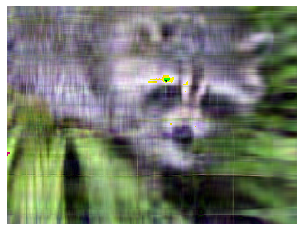

(768, 1024, 3)


In [14]:
plt.imshow(recon_color_img)
plt.axis('off')
plt.show()
print(recon_color_img.shape)